In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as image
import glob
import os

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from sklearn.model_selection import train_test_split

from tensorflow.keras import layers, Input, Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input as pp_i
from tensorflow.keras.layers import RandomFlip, RandomRotation, Dense, Dropout
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam


In [42]:
# Define the file path and get the image names
images_fp = './images'

In [43]:
image_names = [os.path.basename(file) for file in glob.glob(os.path.join(images_fp,'*.jpg'))]

In [44]:
print(f"Total images found: {len(image_names)}")

Total images found: 7389


In [45]:
labels = [' '.join(name.split('_')[:-1:]) for name in image_names]

In [46]:
# Define the labels
def label_encode(label):
    if label == 'Abyssinian' : return 0
    elif label == 'Bengal' : return 1
    elif label == 'Birman' : return 2
    elif label == 'Bombay' : return 3
    elif label == 'British Shorthair' : return 4
    elif label == 'Egyptian Mau' : return 5
    elif label == 'american bulldog' : return 6
    elif label == 'american pit bull terrior' : return 7
    elif label == 'basset hound' : return 8
    elif label == 'beagle' : return 9
    elif label == 'boxer' : return 10
    elif label == 'chihuahua' : return 11
    elif label == 'english cocker spaniel' : return 12
    elif label == 'english setter' : return 13
    elif label == 'german shorthaired' : return 14
    elif label == 'great pyreneas' : return 15
    else: return None



In [47]:
# Initialize lists to store features and labels
features = []
labels = []
IMAGE_SIZE = (224,224)

# Process each image and its label
for name in image_names:
    label = ' '.join(name.split('_')[:-1:])
    label_encoded = label_encode(label)
    if label_encoded != None:
        img = load_img(os.path.join(images_fp, name))
        img = tf.image.resize_with_pad(img_to_array(img, dtype = 'uint8'), *IMAGE_SIZE).numpy().astype('uint8')
        features.append(img)
        labels.append(label_encoded)

In [48]:
features

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 

In [49]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,


In [50]:
# Convert lists to numpy arrays
features_array = np.array(features)
labels_array = np.array(labels)

In [51]:
labels_one_hot = pd.get_dummies(labels_array).values

In [52]:
labels_one_hot

array([[ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False,  True]])

In [53]:
# Check the number of unique classes
unique_labels = np.unique(labels_array)
num_classes = len(unique_labels)
print(f"Number of unique classes: {num_classes}")

Number of unique classes: 14


In [54]:
# Split the data into train, validation, and test sets
#Train - 65% + val = 25% and Test: 20%
X_train, X_test, y_train, y_test = train_test_split(features_array, labels_one_hot, test_size = 0.2, random_state=42)

In [55]:
# 80%
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state=1)

In [56]:
# Define data augmentation
data_augmentation = Sequential([RandomFlip("horizontal_and_vertical"), RandomRotation(0.2)])

# Define prediction layers
prediction_layers = Dense(num_classes, activation="softmax")

In [57]:
# Load the ResNet50 model
resnet_model = ResNet50(include_top=False, pooling='avg', weights='imagenet')
resnet_model.trainable = False


In [58]:
#Build model
inputs = Input(shape=(224,224,3))
x=data_augmentation(inputs)
x=pp_i(x)
x=resnet_model(x, training=False)
x=Dropout(0.2)(x)
outputs = prediction_layers(x)
model = Model(inputs, outputs)

In [59]:
# Compile the model
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics = ['accuracy'])

In [60]:
# Train the model
model_history = model.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), epochs=10)

Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 52s 890ms/step - accuracy: 0.2659 - loss: 2.5316 - val_accuracy: 0.8250 - val_loss: 0.6465
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 45s 856ms/step - accuracy: 0.7472 - loss: 0.7441 - val_accuracy: 0.8982 - val_loss: 0.3929
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 46s 862ms/step - accuracy: 0.8355 - loss: 0.4978 - val_accuracy: 0.9018 - val_loss: 0.3413
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 49s 924ms/step - accuracy: 0.8339 - loss: 0.5022 - val_accuracy: 0.9000 - val_loss: 0.3531
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 50s 947ms/step - accuracy: 0.8832 - loss: 0.3608 - val_accuracy: 0.9000 - val_loss: 0.3313
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 51s 974ms/step - accuracy: 0.8645 - loss: 0.3685 - val_accuracy: 0.9089 - val_loss: 0.3039
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.8906 - loss: 0.3236 - val_accuracy: 0.9161 - val_loss: 0.2907
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9041 - loss: 0.3125 - val_accuracy: 

In [61]:
# Plot the training and validation accuracy
acc=model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

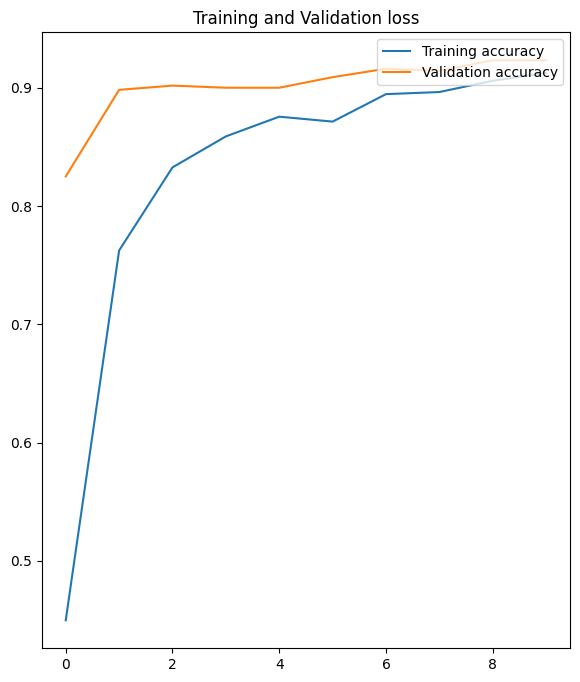

In [62]:
epochs_range = range(10)
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training accuracy')
plt.plot(epochs_range, val_acc, label='Validation accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation loss')

In [63]:
plt.show()

In [64]:
model.evaluate(X_test, y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9274 - loss: 0.2117


[0.2044352889060974, 0.9321428537368774]

In [65]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

18/18 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.9274 - loss: 0.2117
Test accuracy: 0.9321428537368774


In [66]:
y_pred = model.predict(X_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step


In [67]:
y_pred

array([[3.1293199e-05, 3.3851427e-06, 9.9972790e-01, ..., 2.7822663e-05,
        2.2528302e-05, 3.3399647e-07],
       [1.6859070e-04, 1.6383368e-05, 2.8513625e-05, ..., 5.1851606e-04,
        3.0047382e-04, 1.4142184e-02],
       [7.8338362e-06, 7.8942190e-05, 6.6557404e-06, ..., 1.2618572e-03,
        9.5836572e-02, 8.1341130e-01],
       ...,
       [1.2517249e-05, 1.2119426e-05, 9.9962020e-01, ..., 1.3129204e-05,
        1.5535332e-05, 4.9820148e-08],
       [1.9446654e-04, 7.0406197e-05, 8.7095268e-06, ..., 2.1587377e-05,
        7.8376588e-06, 2.8425455e-04],
       [2.4219718e-08, 3.1995560e-06, 2.4655991e-08, ..., 9.9710864e-01,
        2.8731632e-03, 9.6069252e-06]], dtype=float32)